In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import scipy
import scipy.sparse
import scipy.sparse.linalg

**INIT MESH**

In [2]:
L = 1  # size in space
Nx = 50  # Number of points in space
T = 1  # size in time
Nt = 250  # number of points in time
a = 0.03  # diffusion coefficient

x_mesh = np.linspace(0, L, Nx + 1)  # mesh points in space
dx_mesh = x_mesh[1] - x_mesh[0]
t_mesh = np.linspace(0, T, Nt + 1)  # mesh points in time
dt_mesh = t_mesh[1] - t_mesh[0]
F = a * dt_mesh / dx_mesh ** 2  # Fourier number

u = np.zeros((Nx + 1, Nt + 1))

F  # forward euler scheme misbehave at large F (>= 1/2)

0.3

**INITIAL CONDITION**

In [3]:
def I(x):
    return (1 if x < 0.5 else 0)  # square

# Set initial condition u(x,0) = I(x)
for i in range(0, Nx + 1):
    u[i, 0] = I(x_mesh[i])
# Boundary conditions
u[0, 0] = 0
u[Nx, 0] = 0

**SET UP ANIMATIONS**

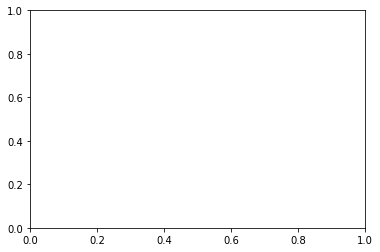

In [4]:
# Set up animations
%matplotlib inline
from IPython.display import HTML

anim_len = 10000
anim_interval = anim_len / Nt

fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
line, = ax.plot([], [], lw=2)

def animate(i):
    y = u[:, i]
    line.set_data(x_mesh, y)
    return line,

**FORWARD EULER SCHEME**

In [5]:
# Compute u at inner mesh points
for n in range(1, Nt + 1):
    for i in range(1, Nx):
        u[i, n] = u[i, n - 1] + F * (u[i - 1, n - 1] - 2 * u[i, n - 1] + u[i + 1, n - 1])
        

In [6]:
anim = animation.FuncAnimation(fig, animate, frames=Nt, interval=anim_interval, blit=True)
HTML(anim.to_jshtml())

**BACKWARD EULER SCHEME**

In [7]:
# Data structures for the linear system
b = np.zeros(Nx + 1)

A = scipy.sparse.diags(
    diagonals=[-F, 1 + 2 * F, -F], 
    offsets=[-1, 0, 1], 
    shape=(Nx + 1, Nx + 1), 
    format="csr"
)
# Boundary condition
A[0] = 0
A[Nx] = 0
A[0, 0] = 1
A[Nx, Nx] = 1
A[1, 0] = 0
A[Nx - 1, Nx] = 0

c:\users\phung\appdata\local\programs\python\python39\lib\site-packages\scipy\sparse\_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [8]:
for n in range(1, Nt):
    # Compute b and solve linear system
    b[1:Nx] = u[1:Nx, n - 1]
    u[:, n] = scipy.sparse.linalg.spsolve(A, b)

In [9]:
anim = animation.FuncAnimation(fig, animate, frames=Nt, interval=anim_interval, blit=True)
HTML(anim.to_jshtml())